In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/adaboost_dataset.csv')

In [ ]:
df.head()

,Age,Salary,Account_Balance,Tenure_Years,Churn
0,56,78053,49747,5,0
1,69,41959,22606,3,0
2,46,25530,22699,7,0
3,32,23748,1876,2,1
4,60,33545,33093,9,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              200 non-null    int64
 1   Salary           200 non-null    int64
 2   Account_Balance  200 non-null    int64
 3   Tenure_Years     200 non-null    int64
 4   Churn            200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Age,Salary,Account_Balance,Tenure_Years,Churn
count,200.00000,200.000000,200.000000,200.000000,200.000000
mean,43.42500,58856.870000,24755.435000,4.725000,0.320000
std,14.94191,23306.295335,13903.405255,2.555785,0.467647
min,18.00000,20301.000000,1412.000000,1.000000,0.000000
25%,31.00000,38459.250000,12788.000000,2.000000,0.000000
50%,43.50000,60791.000000,24562.000000,5.000000,0.000000
75%,56.00000,76704.500000,36260.250000,7.000000,1.000000
max,69.00000,99909.000000,49816.000000,9.000000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Salary,0
Account_Balance,0
Tenure_Years,0
Churn,0


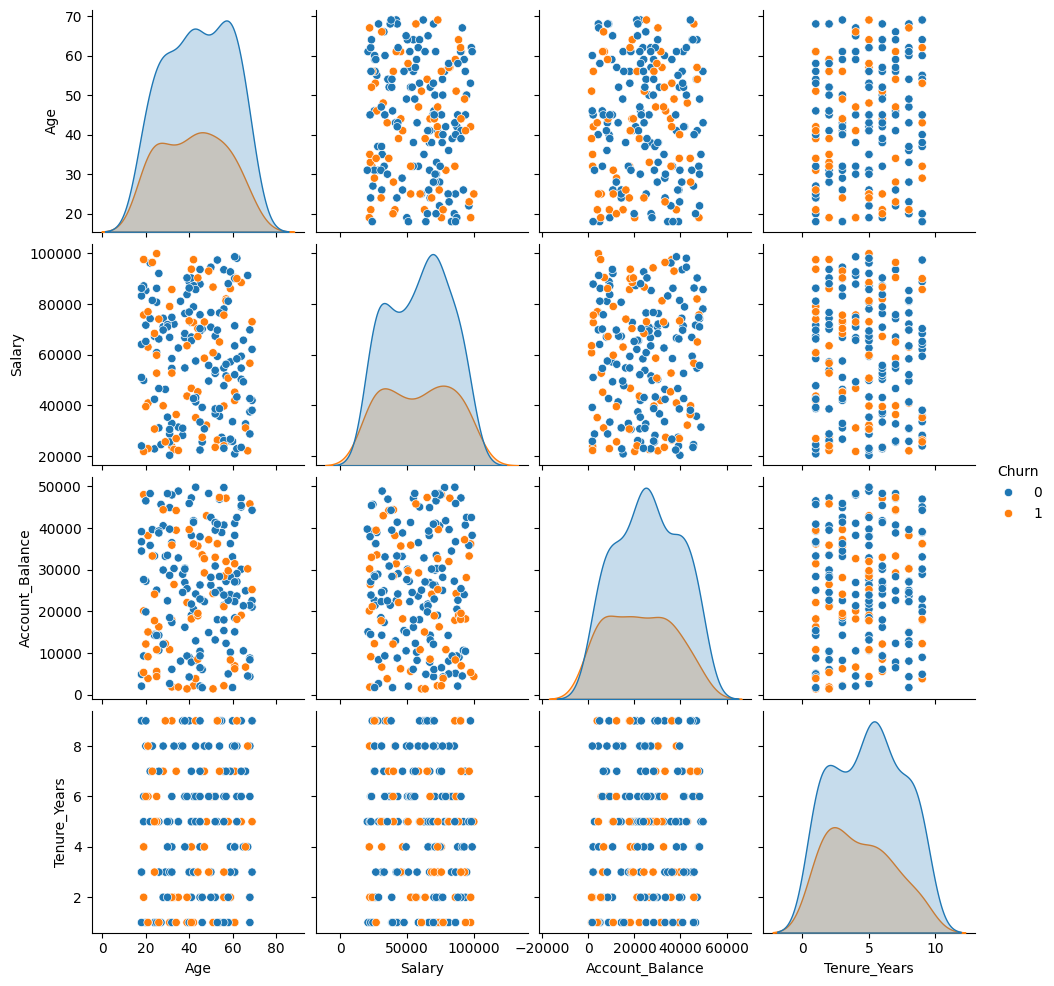

In [ ]:
# Pair plot
sns.pairplot(df, hue='Churn')
plt.show()

In [ ]:
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
X = df[['Age', 'Salary', 'Account_Balance', 'Tenure_Years']]
y = df['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)

model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.5


In [ ]:
# Confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[20  7]
 [13  0]]


In [ ]:
# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.74      0.67        27
           1       0.00      0.00      0.00        13

    accuracy                           0.50        40
   macro avg       0.30      0.37      0.33        40
weighted avg       0.41      0.50      0.45        40

